# Part II - Used car dataset presentation
## by Ujunwa Dike




## Investigation Overview


The overall goal of the presentation is to demostrate from the analysed data the selling price of cars, the years they were purchased, whether the cars have been sold out or not, and how complementary features of cars in the dataset such technical features(engine sizes, km_driven, horsepower) and non-technical features(name, region etc) affect or are affected by these features of interest.


## Dataset Overview



The `user car dataset` is a large dataset  gathered by a consulting firm across the market through their market survey

#### Dataset Dictionary
-**sales_id:** the recorded sales id
-**name:** the name of the car/ the car company name
-**year:** the year of purchase
-**selling_price:** the selling price of the car
-**km_driven:** the distance driven by the car in kilometers
-**region:** the region the car is used
-**state:** the state the car is used
-**city:** the city where the car is used
-**fuel:** the type of fuel used by the car
-**seller_type:** who sells the car
-**transmission:** the  transmission type of the car
-**owner:** the type of ownership
-**mileage:** the distance travelled per gasoline/fuel used
-**engine** the engine size in cubic centimeter(cc)
-**max_power:** the power/horsepower of the car
-**torque:** the turning force capacity in Newton meter(Nm)
-**max_rpm:** the highest revolution per minute(rpm)
-**seats :** the number of seats in the car
-**sold:** the state of car, sold out or not 




In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
car2 = pd.read_csv('UserCarData2.csv')

In [5]:
#duplication of the dataset
car = car2.copy()

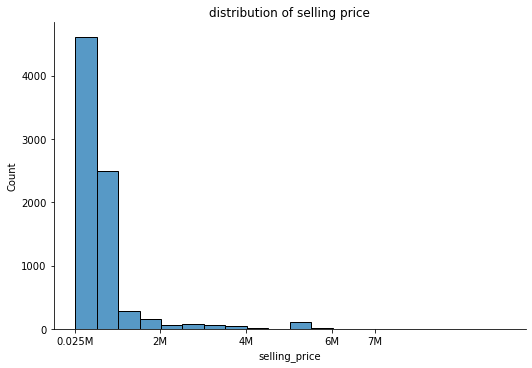

In [6]:
#plotting the distribution for selling price
sns.displot(car, x='selling_price', bins=20, aspect =1.5)
plt.xticks([25e3,2000e3,4000e3,6000e3,7000e3],['0.025M','2M','4M','6M','7M'])
plt.title('distribution of selling price');

## Distribution of mileage.

> Mileage defines the amount of fuel consumed per distance travel. A car with high mileage is said to consume a large amount of fuel per distance, hence the need to check the distribution of the car mileage in the dataset. This goes to say that it could equally affect the price of cars in the dataset. The mileage have normal distribution with most mileage around `20`.

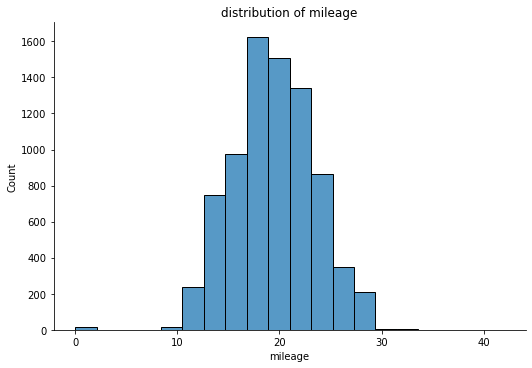

In [7]:
#getting the new distribution plotting
sns.displot(car, x='mileage', bins=20, aspect= 1.5)
plt.title('distribution of mileage');

## Distribution of year
The time at which the cars in the dataset had been purchased is also important to determine if the price of cars would be high generally in the dataset. More cars were purchased between `2010` through `2020` with a skew to the left from `2010` .

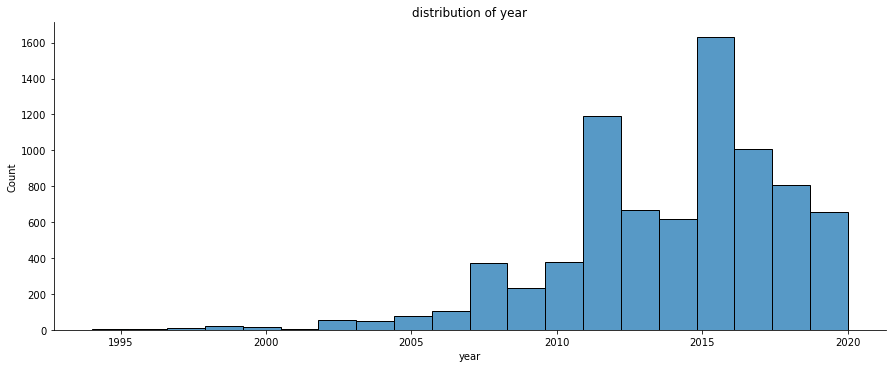

In [8]:
#plotting the distribution of year
sns.displot(car, x='year', bins=20,aspect = 2.5)
plt.title('distribution of year');

## plotting the distribution for name
The name/brand name of cars is also an important part of the dataset. There's a tendency for expensive brands to be less abundant in nature. The first five highest brands were `Maruti`, `Mahindra`, `Honda`, `Hyundai`, and `Tata.`


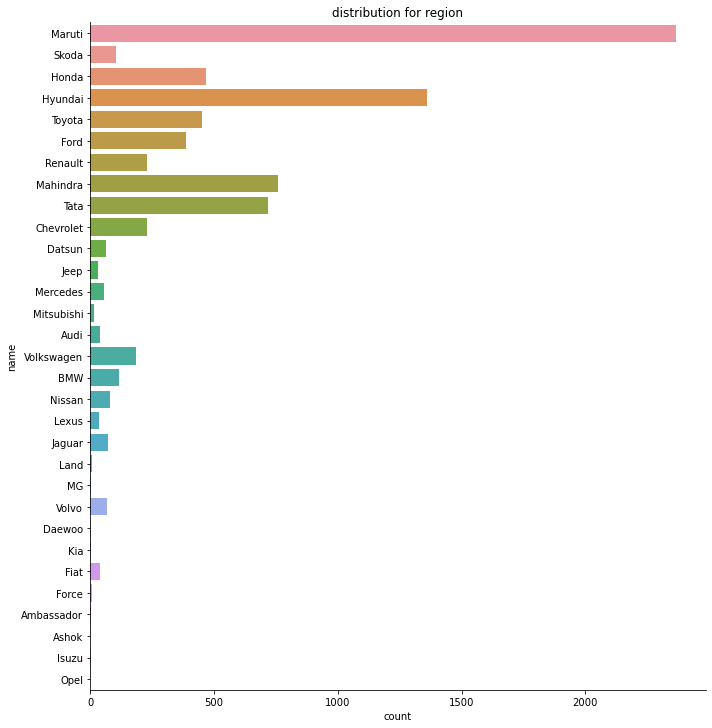

In [9]:
#plotting the distribution for name
sns.catplot(data = car, y='name',kind='count',height= 10)
plt.title('distribution for region');

## plotting the relationship between engine and the power in the dataset

Determinig the engine size of a car could be a way to also determine the power with which the car was built. Both features are technical property of a car and hence their could be a relationship. The plot shows that there's a strong relatioship between the engine size and the car power

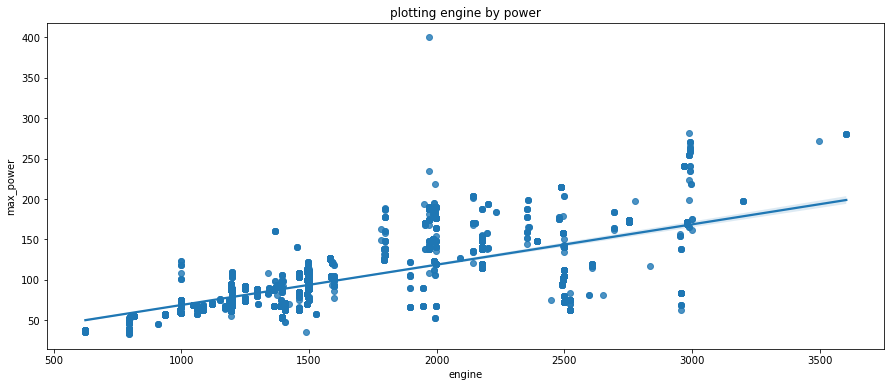

In [10]:
#plotting the relationship between engine and the power in the dataset
ax = plt.subplots(figsize=(15, 6))
sns.regplot(data=car, x="engine", y='max_power')
plt.title('plotting engine by power');

## plotting the relationship between the mileage and the power of cars in the dataset
In order to find out if a car with high power actually consume a high amount of fuel per distance travel, a plot has to be made. This reveal that there's a negative regressive correlation between this two.



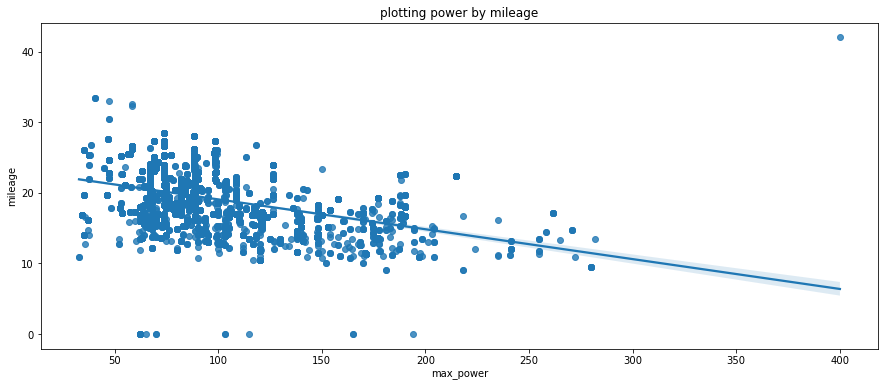

In [11]:
#plotting the relationship between the mileage and the power of cars in the dataset
ax = plt.subplots(figsize=(15, 6))
sns.regplot(data =car, x="max_power", y='mileage')
plt.title('plotting power by mileage');


## Finding the relationship between the engine size and selling price

This examines the effect of engine size on selling price. This shows most cars in the dataset with low engine size have generally low prices. Most cars with less than `1500cc` and below had selling price below `$4m`

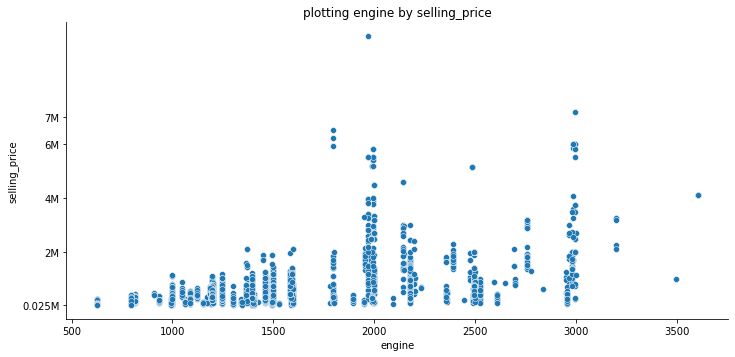

In [12]:
#finding the relationship between the engine size and selling price
sns.relplot(data=car, x="engine", y='selling_price', aspect = 2)
plt.yticks([25e3,2000e3,4000e3,6000e3,7000e3],['0.025M','2M','4M','6M','7M'])
plt.title('plotting engine by selling_price');

## Determining the selling price over time
  Here, the `selling price` of cars in the dataset increased over time. This shows a general increase in price over the `years`.

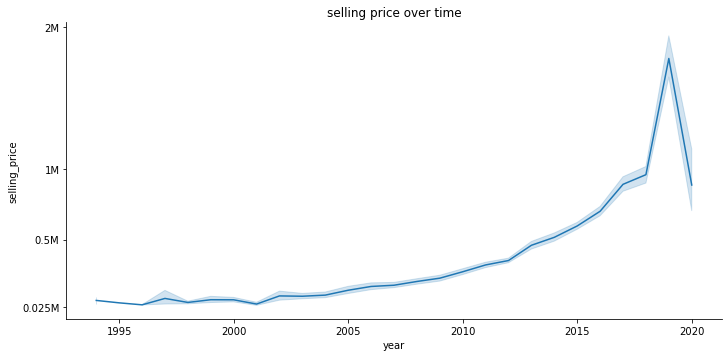

In [13]:
#plotting the selling price over time
sns.relplot(data=car, x= 'year', y='selling_price',aspect = 2, kind= 'line')
plt.yticks([25e3,500e3,1000e3,2000e3],['0.025M','0.5M','1M','2M'])
plt.title('selling price over time');

## Determining the seller types and their selling prices, who sells more expensively?
This plotting figures out which seller had more expensive cars. This in turn could suggest that such seller could be trusted when it comes to buying cars of higher power and better mileage. The analysis shows that the `dealer_type` sellers had more of the most expensive cars

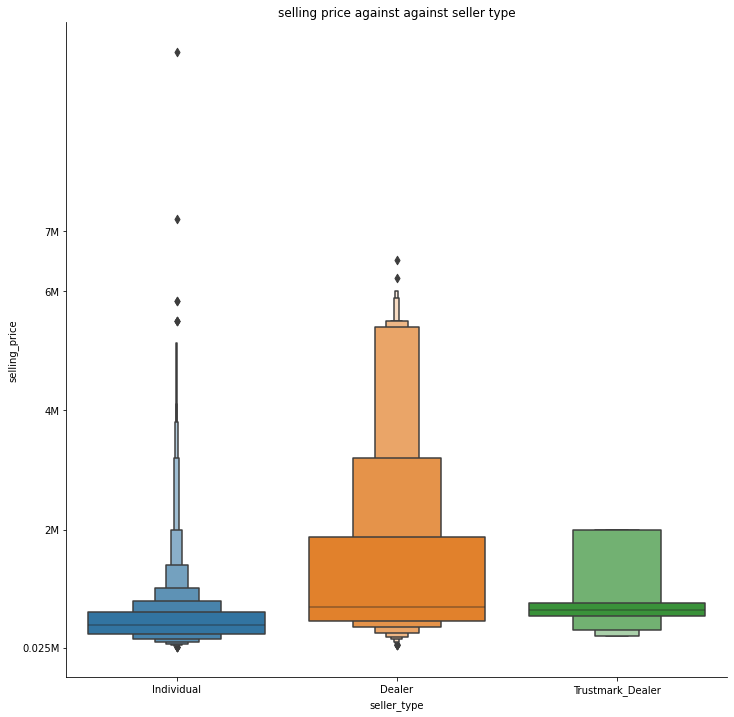

In [14]:
#creating a fuction to plot a distribution of non-numeric data against selling price 
def plt_bivar(a):
    sns.catplot( y="selling_price", x= a, kind = 'boxen' , data =car, height = 10,aspect =1)
    plt.yticks([25e3,2000e3,4000e3,6000e3,7000e3],['0.025M','2M','4M','6M','7M']);
    
#showing the  seller type(non-numeric) over the price
plt_bivar('seller_type')
plt.title('selling price against against seller type');


## Distribution of selling prices over seat number of cars 
The dataset reveals that cars with 4, 5 and 7 seat numbers are higher in prices. Although 4-seater cars should be expensive based on demand, however it looks like its because they have good engine sizes.

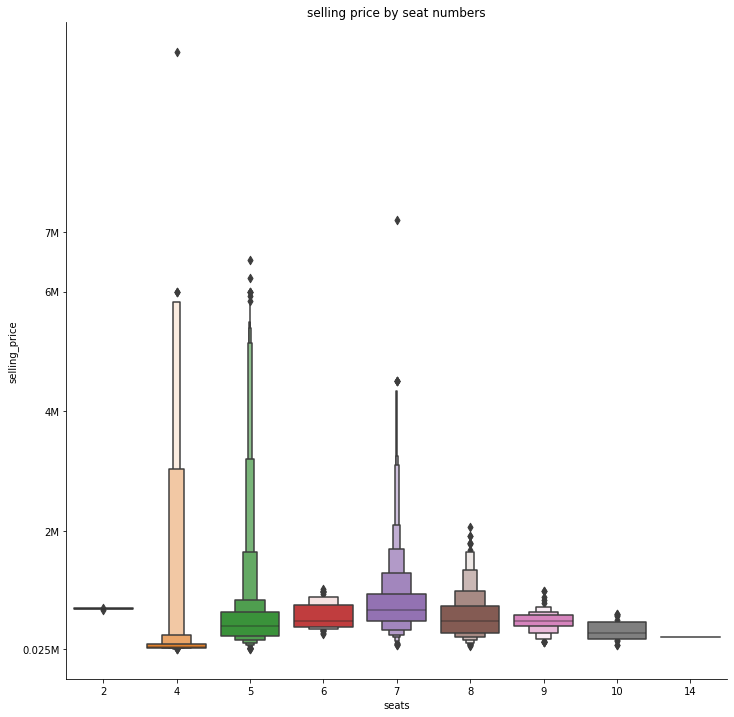

In [15]:
#plotting the price distribution over the number of seats
plt_bivar('seats')
plt.title('selling price by seat numbers');

## The selling price for each region based on whether sales were made or not


This aims to find the distribution of selling prices in different regions in the dataset. The cheapest cars are the four-seater vehicles with 4 seats from the west. The most expensive ones is a 4-seater type of cars from the East, however, might have probably been sold.

Title : selling price by region and seat number by sold


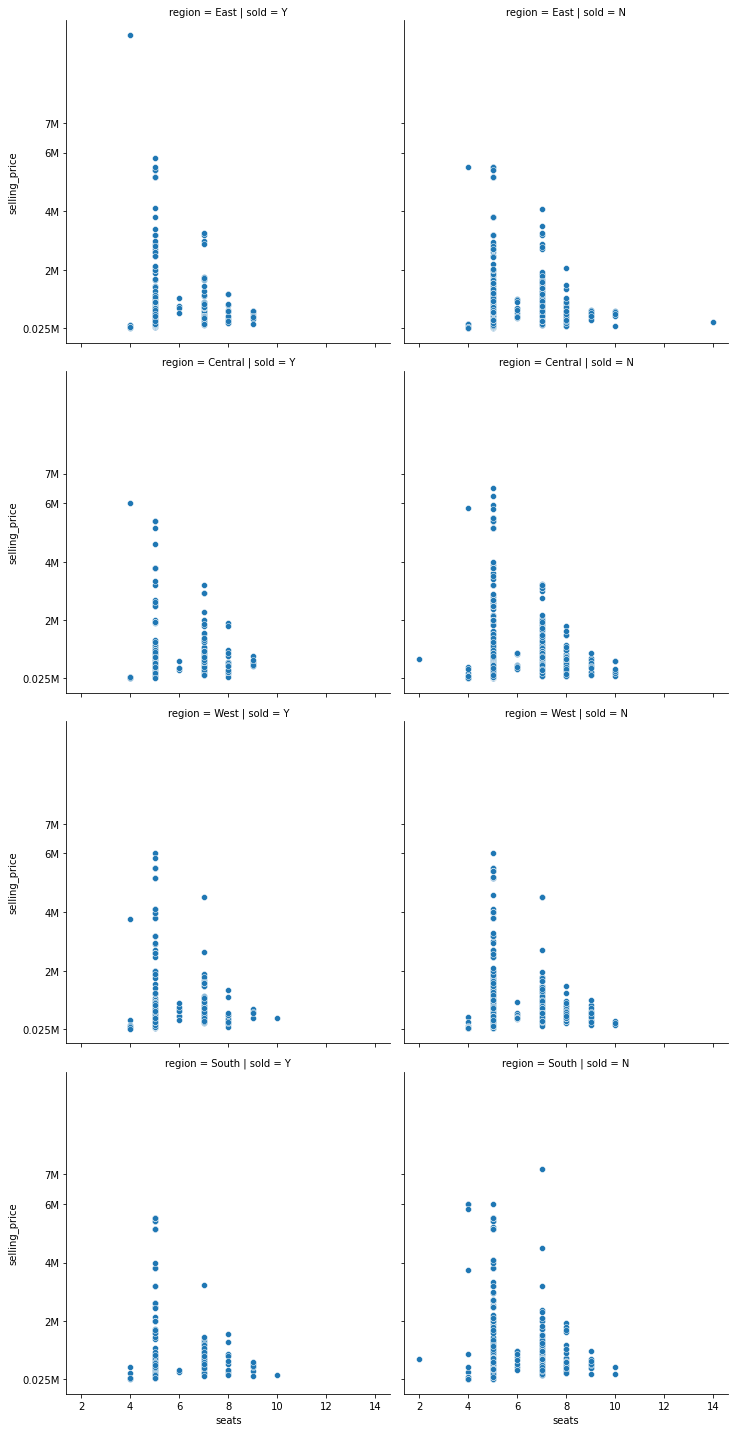

In [16]:
#plotting the selling price for each region based on whether sales were made or not
sns.relplot(data = car, x = 'seats', y='selling_price', row = 'region', col= 'sold', );
plt.yticks([25e3,2000e3,4000e3,6000e3,7000e3],['0.025M','2M','4M','6M','7M'])
print('Title : selling price by region and seat number by sold');

## Examining by amount the different ownership types from different regions and seat numbers

The analysis shows most abundant type of cars are found in the East with 5-seater and with first_owner type of ownership


Title: owner-type by seat numbers and region


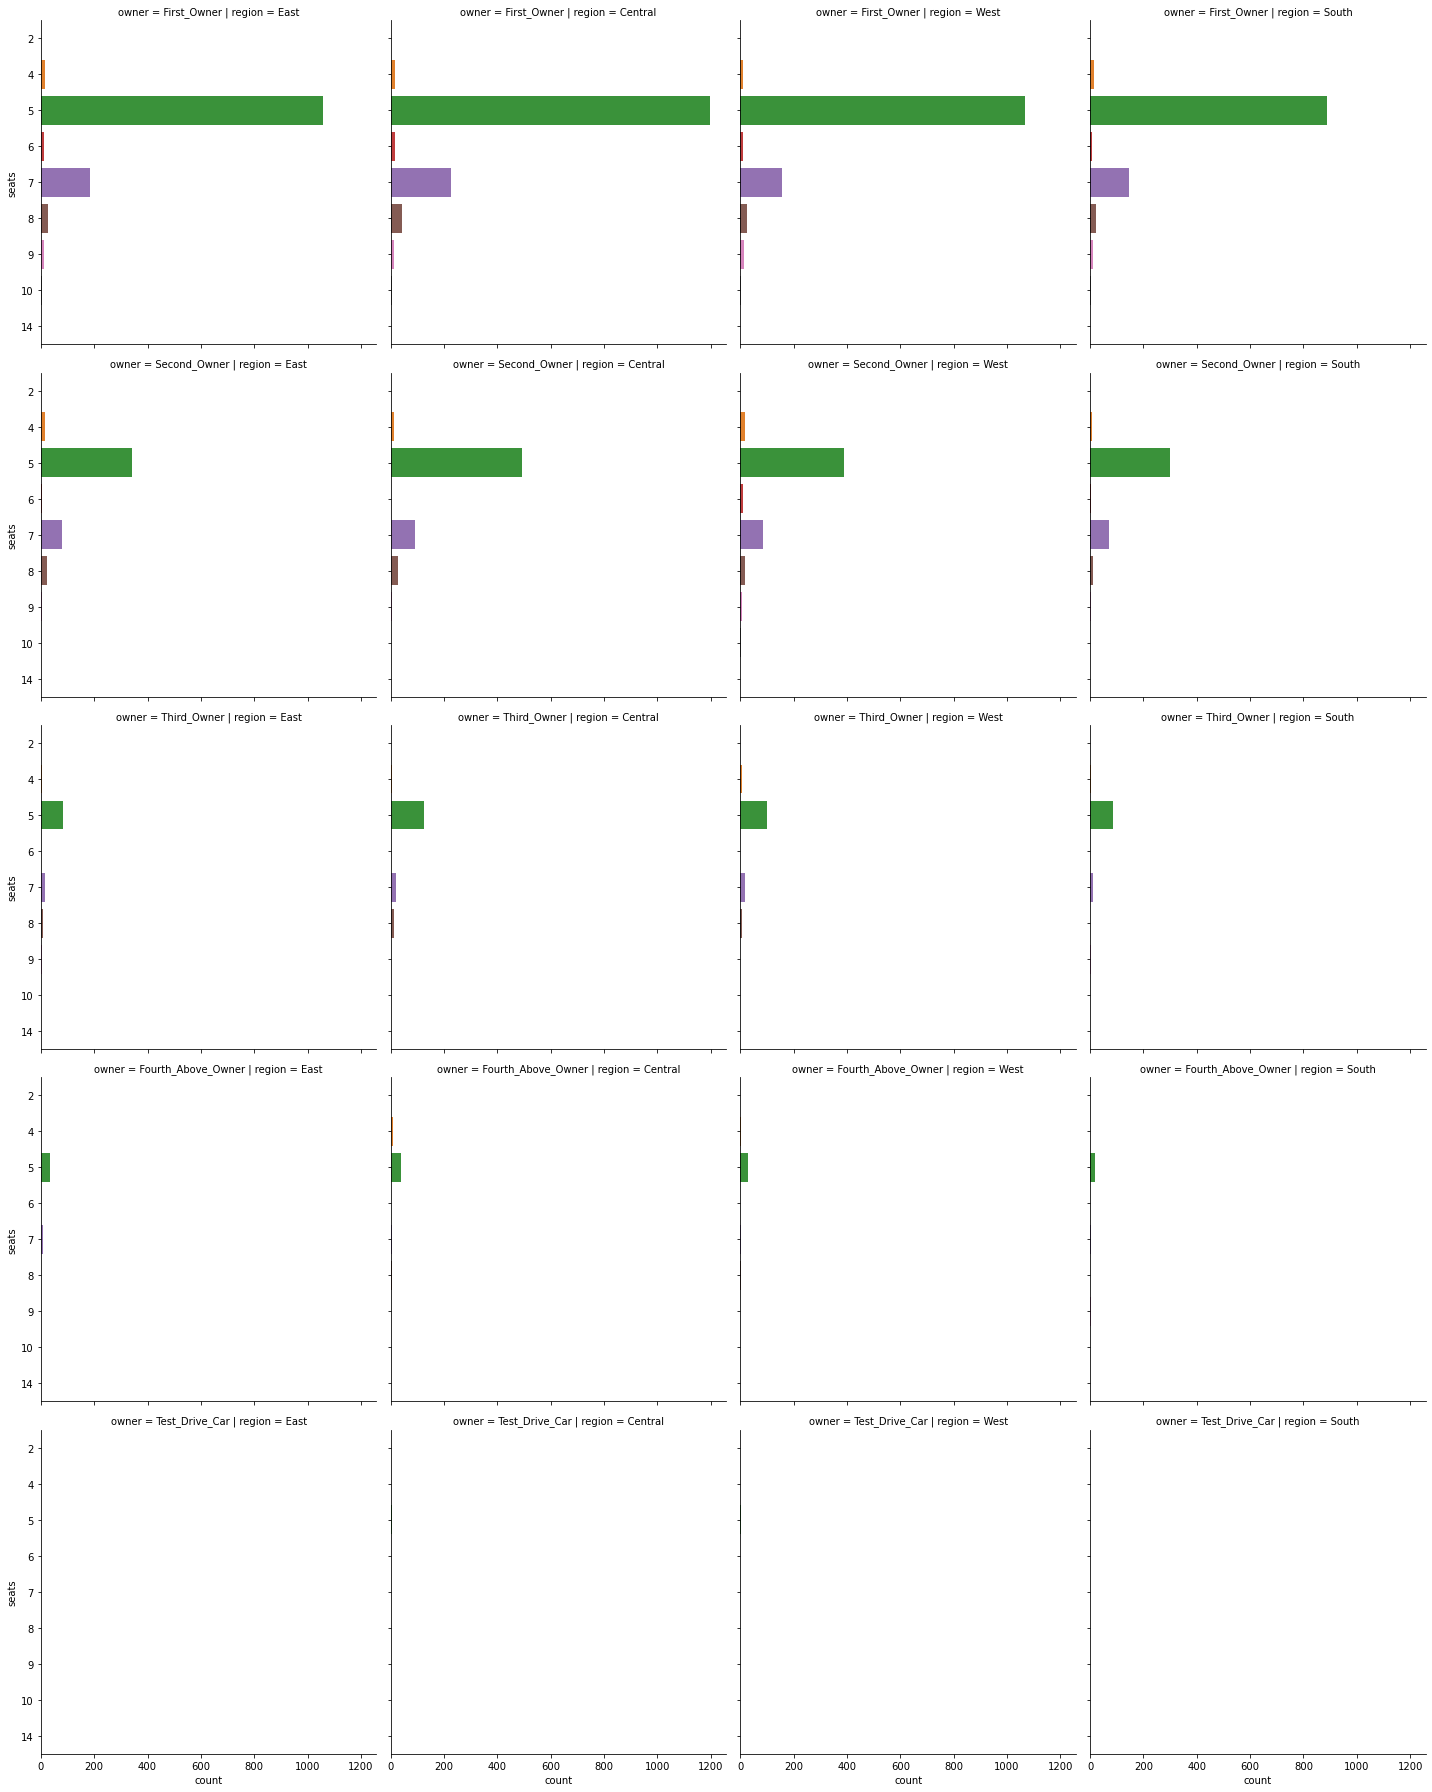

In [17]:
#plotting a comparison of different seat numbers by different ownership and region
sns.catplot( data = car ,y='seats', kind = 'count', row='owner', col= 'region')
print('Title: owner-type by seat numbers and region');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 